**1) Delivery_time -> Predict delivery time using sorting time**

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset
data = pd.read_csv('/content/delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


**EDA and Data Visualization**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<ipython-input-4-7f4a500778a0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


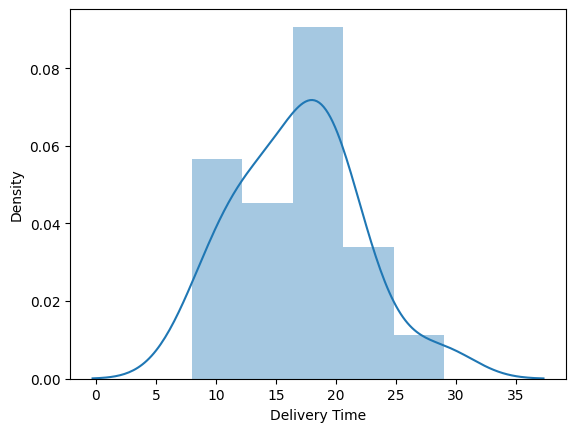

In [4]:
sns.distplot(data['Delivery Time'])
plt.show()

<ipython-input-5-2298fabb442d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


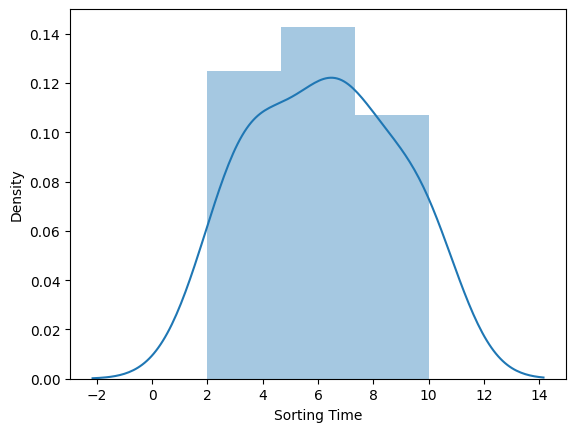

In [5]:
sns.distplot(data['Sorting Time'])
plt.show()

**Feature Engineering**

In [6]:
data = data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


**Correlation Analysis**

In [7]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

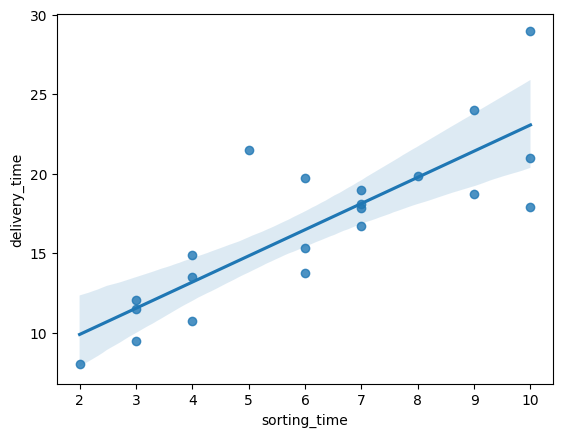

In [8]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

**Model Building**

In [9]:
model = smf.ols('delivery_time~sorting_time',data=data).fit()

**Model testing**

In [10]:
model.params        #coefficient parameters

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [11]:
model.tvalues 

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [12]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [13]:
model.rsquared

0.6822714748417231

In [14]:
model.rsquared_adj

0.6655489208860244

**Model Prediction**

In [15]:
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [16]:
data_pred = pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [17]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

**2) Salary_hike -> Build a prediction model for Salary_hike**

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [18]:
# Import libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
#Load dataset
salary = pd.read_csv('/content/Salary_Data.csv')
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


**EDA and Data Visualization**

In [20]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<ipython-input-21-ab2eeefaaf36>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

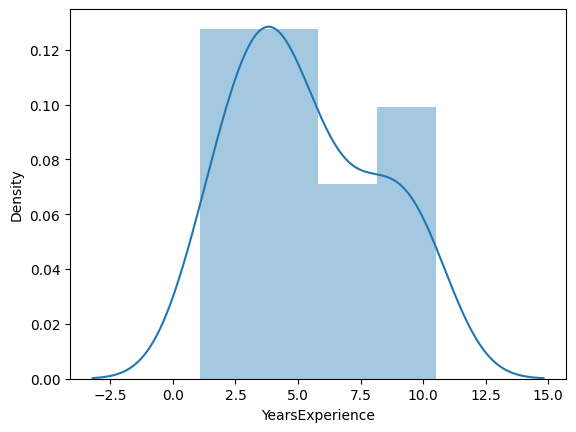

In [21]:
sns.distplot(salary['YearsExperience'])

<ipython-input-22-36cdd9539e89>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

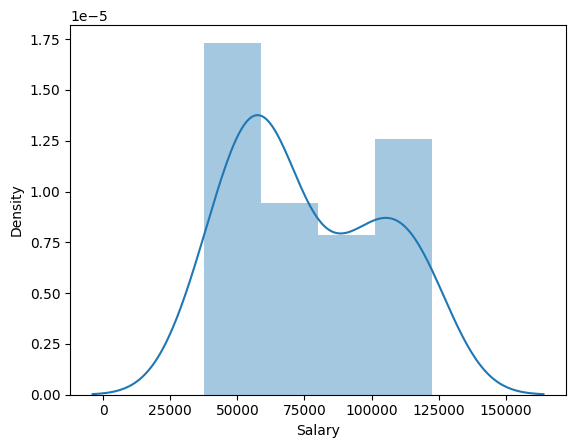

In [22]:
sns.distplot(salary['Salary'])

**Correlation analysis**

In [23]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

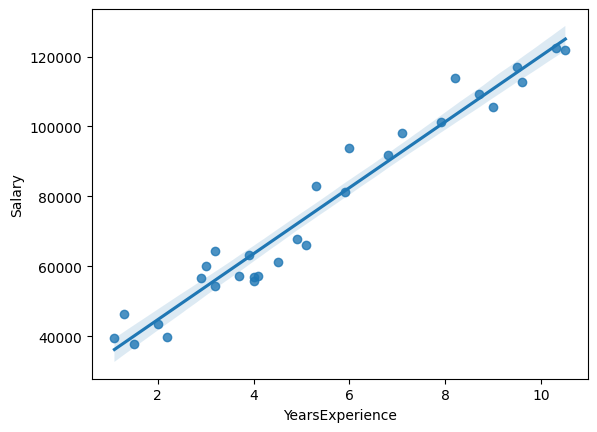

In [24]:
sns.regplot(x = salary['YearsExperience'],y = salary['Salary'])

**Model Building**

In [25]:
model = smf.ols('Salary~YearsExperience',data=salary).fit()

**Model Testing**

In [26]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [27]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [28]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [29]:
model.rsquared

0.9569566641435086

In [30]:
model.rsquared_adj

0.9554194021486339

**Model Prediction**

In [31]:
new_data = pd.Series([5,6])
new_data

0    5
1    6
dtype: int64

In [32]:
data_pred = pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,5
1,6


In [33]:
model.predict(data_pred)

0    73042.011806
1    82491.974127
dtype: float64